In [47]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

In [48]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [49]:
data = []
conversation = 'WhatsApp Chat with CSE B section (unofficial).txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [50]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

           Date   Time           Author  \
1918 2024-12-17  16:12  Raghavendra Dsu   
1919 2024-12-17  16:12  Raghavendra Dsu   
1920 2024-12-17  16:13  Raghavendra Dsu   
1921 2024-12-17  16:14  Raghavendra Dsu   
1922 2024-12-17  19:36       Lekhak Dsu   
1923 2024-12-17  19:39  +91 91102 39594   
1924 2024-12-17  19:39       Likith Dsu   
1925 2024-12-17  19:40       Likith Dsu   
1926 2024-12-17  19:40  +91 91102 39594   
1927 2024-12-18  14:42             None   
1928 2024-12-18  21:23       Lekhak Dsu   
1929 2024-12-19  10:23             None   
1930 2024-12-19  10:23           Navtej   
1931 2024-12-19  20:40  +91 63603 32487   
1932 2024-12-19  20:43  +91 63603 32487   
1933 2024-12-19  22:32  +91 63603 32487   
1934 2024-12-19  22:32  +91 63603 32487   
1935 2024-12-19  22:32  +91 63603 32487   
1936 2024-12-20  09:33      Prajwal B R   
1937 2024-12-20  10:17           Navtej   

                                                Message  
1918                                  

C:\Users\User\AppData\Local\Temp\ipykernel_14492\1252384782.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [51]:
total_messages = df.shape[0]
print(total_messages)

1938


In [52]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

542


In [53]:
print(df.head())


        Date   Time Author                                            Message
0 2023-09-20  08:45   None      Lekhak Dsu created group "CSE Core B section"
1 2023-09-20  09:43   None          You joined using this group's invite link
2 2023-09-20  09:47   None     Nithin P joined using this group's invite link
3 2023-09-20  09:48   None      Pratham joined using this group's invite link
4 2023-09-20  09:53   None  +91 93539 65598 joined using this group's invi...


In [54]:
# Define the function to extract emojis
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):  # Check for emojis
            emoji_list.append(word)
    return emoji_list

# Example DataFrame
df = pd.DataFrame({
    "Message": ["Hello 😊", "How are you? 🤔👍", "No emojis here!", "🎉 Party time! 🎈"]
})

# Apply the function to extract emojis
df['emoji'] = df["Message"].apply(split_count)

# Count total number of emojis
emojis = sum(df['emoji'].str.len())
print("Total emojis:", emojis)

# Display emojis for each message
print("\nEmoji breakdown:")
for index, row in df.iterrows():
    print(f"Message: {row['Message']}")
    print(f"Emojis: {', '.join(row['emoji']) if row['emoji'] else 'None'}")
    print(f"Count: {len(row['emoji'])}\n")


Total emojis: 5

Emoji breakdown:
Message: Hello 😊
Emojis: 😊
Count: 1

Message: How are you? 🤔👍
Emojis: 🤔, 👍
Count: 2

Message: No emojis here!
Emojis: None
Count: 0

Message: 🎉 Party time! 🎈
Emojis: 🎉, 🎈
Count: 2



In [55]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Navtej and +91 63603 32487")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared: ", emojis)
print("Number of Links Shared: ", links)

Chats between Navtej and +91 63603 32487
Total Messages:  1938
Number of Media Shared:  542
Number of Emojis Shared:  5
Number of Links Shared:  0


In [56]:
import pandas as pd
import regex
import numpy as np

# Load the chat file
with open("WhatsApp Chat with CSE B section (unofficial).txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Parse chat lines
messages = []
for line in lines:
    if regex.match(r"^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} -", line):  # Check for message format
        messages.append(line.strip())
    elif messages:
        messages[-1] += " " + line.strip()  # Append continuation lines to the last message

# Extract date, time, author, and message
data = []
for msg in messages:
    match = regex.match(r"^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - ([^:]+): (.+)$", msg)
    if match:
        date, time, author, message = match.groups()
        data.append([date, time, author, message])
    else:
        data.append([None, None, "System", msg])  # System messages

# Create DataFrame
df = pd.DataFrame(data, columns=["Date", "Time", "Author", "Message"])

# Filter out media messages
media_messages_df = df[df["Message"] == "<Media omitted>"]
messages_df = df.drop(media_messages_df.index)

# Add additional columns for statistics
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s: len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s: len(s.split()))
messages_df["MessageCount"] = 1

# List of specific authors
authors = ["Navtej", "+91 63603 32487"]
for author in authors:
    # Filter messages for each author
    req_df = messages_df[messages_df["Author"] == author]
    print(f"\nStats of {author} -")
    print(f"Messages Sent: {req_df.shape[0]}")
    words_per_message = np.sum(req_df['Word_Count']) / req_df.shape[0] if req_df.shape[0] > 0 else 0
    print(f"Average Words per Message: {words_per_message}")
    media = media_messages_df[media_messages_df['Author'] == author].shape[0]
    print(f"Media Messages Sent: {media}")
    emojis = sum(req_df['Message'].apply(lambda s: len(regex.findall(r'\X', s)) if regex.findall(r'\X', s) else 0))
    print(f"Emojis Sent: {emojis}")
    links = sum(req_df['Message'].str.count("http"))  # Count URLs
    print(f"Links Sent: {links}")



Stats of Navtej -
Messages Sent: 81
Average Words per Message: 14.851851851851851
Media Messages Sent: 44
Emojis Sent: 7324
Links Sent: 4

Stats of +91 63603 32487 -
Messages Sent: 426
Average Words per Message: 18.690140845070424
Media Messages Sent: 137
Emojis Sent: 50348
Links Sent: 62


In [57]:
# Define the function to extract emojis
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):  # Check for emojis
            emoji_list.append(word)
    return emoji_list

# Apply the function to extract emojis
messages_df['emoji'] = messages_df['Message'].apply(split_count)

# Verify the emoji column
print(messages_df.head())

# Flatten and deduplicate emojis
try:
    total_emojis_list = list(set([a for b in messages_df['emoji'] for a in b]))
    total_emojis = len(total_emojis_list)
    print("Total unique emojis:", total_emojis)
    print("List of unique emojis:", total_emojis_list)
except KeyError as e:
    print("Error:", e)
    print("Ensure that the `emoji` column exists and is correctly created.")


   Date  Time  Author                                            Message  \
0  None  None  System  20/09/23, 09:43 - Messages and calls are end-t...   
1  None  None  System  20/09/23, 08:45 - Lekhak Dsu created group "CS...   
2  None  None  System  20/09/23, 09:43 - You joined using this group'...   
3  None  None  System  20/09/23, 09:47 - Nithin P joined using this g...   
4  None  None  System  20/09/23, 09:48 - Pratham joined using this gr...   

   Letter_Count  Word_Count  MessageCount emoji  
0           157          28             1    []  
1            63          11             1    []  
2            59          10             1    []  
3            64          11             1    []  
4            63          10             1    []  
Total unique emojis: 138
List of unique emojis: ['🕑', '🙌', '👆', '🌿', '🎨', '🎤', '📋', '😊', '🎂', '📄', '🫶🏻', '💻', '📌', '🔺', '❤️\u200d🩹', '👍🏼', '🥂', '🎸', '🎊', '❗', '😘', '💛', '👍', '🔥', '🥹', '👩\u200d💻', '📅', '🙏', '🫂', '🪔', '💸', '🌠', '❤️', '💰', '🍬', '

There are 116710 words in all the messages.


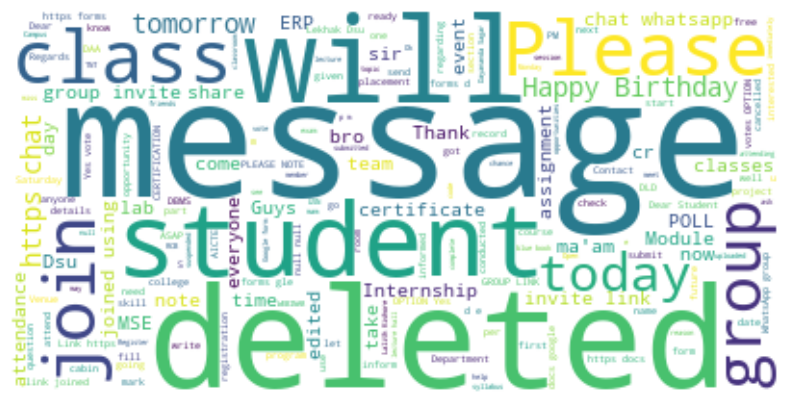

In [58]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name: Navtej


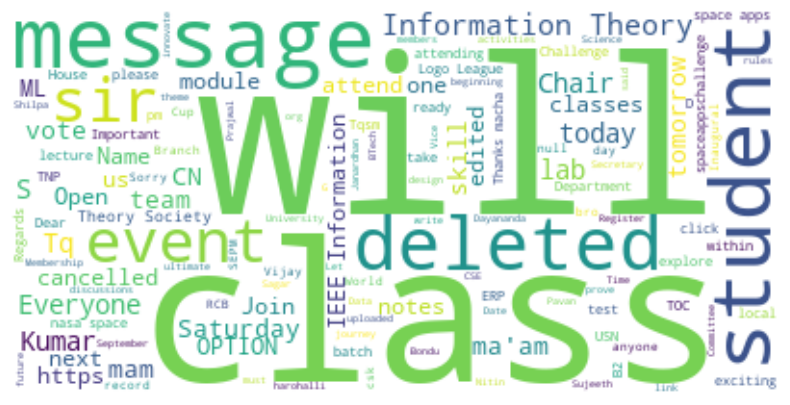

Author name: +91 63603 32487


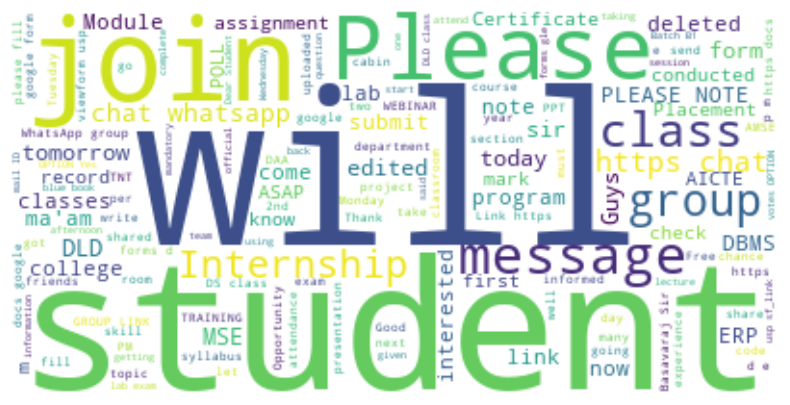

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

l = ["Navtej", "+91 63603 32487"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    if dummy_df.empty:
        print(f"No messages found for author: {l[i]}")
        continue
    
    text = " ".join(review for review in dummy_df.Message if isinstance(review, str))
    if not text.strip():
        print(f"No text content for author: {l[i]}")
        continue
    
    stopwords = set(STOPWORDS)
    print(f"Author name: {l[i]}")
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14492\3662882261.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_authors, x='Author', y='MessageCount', palette='viridis')


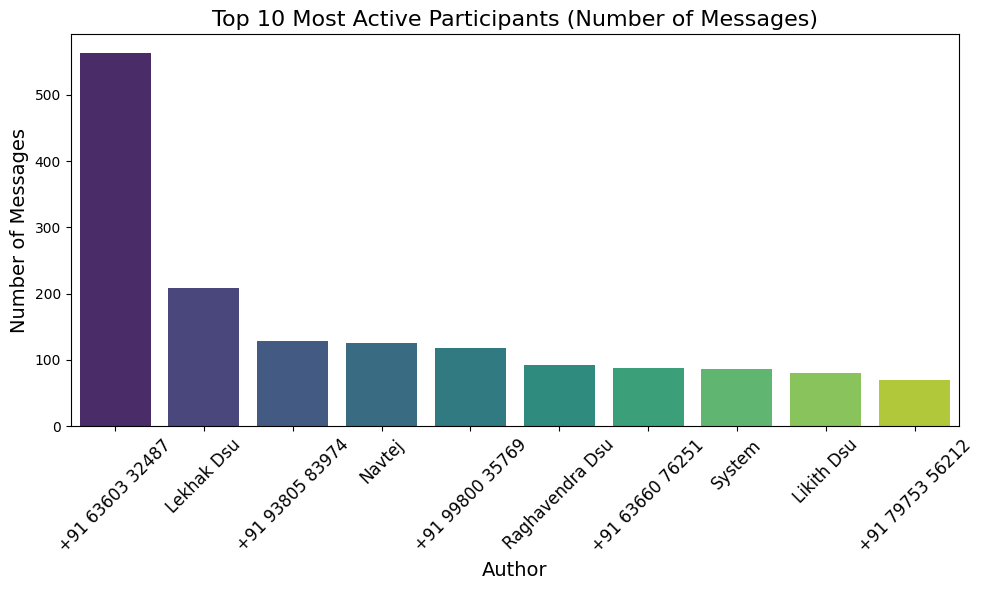

In [62]:
# Group messages by Author and count
message_counts = df.groupby('Author')['Message'].count().reset_index()
message_counts.rename(columns={'Message': 'MessageCount'}, inplace=True)

# Sort by MessageCount in descending order and take the top 10
top_10_authors = message_counts.sort_values(by='MessageCount', ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_authors, x='Author', y='MessageCount', palette='viridis')

# Customizing the plot
plt.title("Top 10 Most Active Participants (Number of Messages)", fontsize=16)
plt.xlabel("Author", fontsize=14)
plt.ylabel("Number of Messages", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


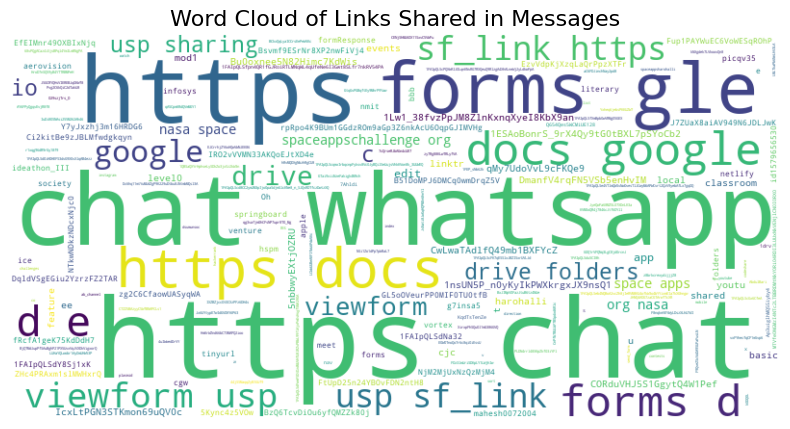

In [68]:

# Define a regular expression pattern to extract URLs
URLPATTERN = r'(https?://[^\s]+)'

# Extract URLs from the Message column
df['Links'] = df['Message'].apply(lambda x: " ".join(re.findall(URLPATTERN, str(x))))

# Combine all links into one string
all_links = " ".join(df['Links'])

# Generate a word cloud for links
if not all_links.strip():
    print("No links found in the data to generate a word cloud.")
else:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="viridis"
    ).generate(all_links)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Links Shared in Messages", fontsize=16)
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14492\3770890486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Replace 'Date' with the actual column name
C:\Users\User\AppData\Local\Temp\ipykernel_14492\3770890486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_dates, x='Date', y='MessageCount', palette='coolwarm')


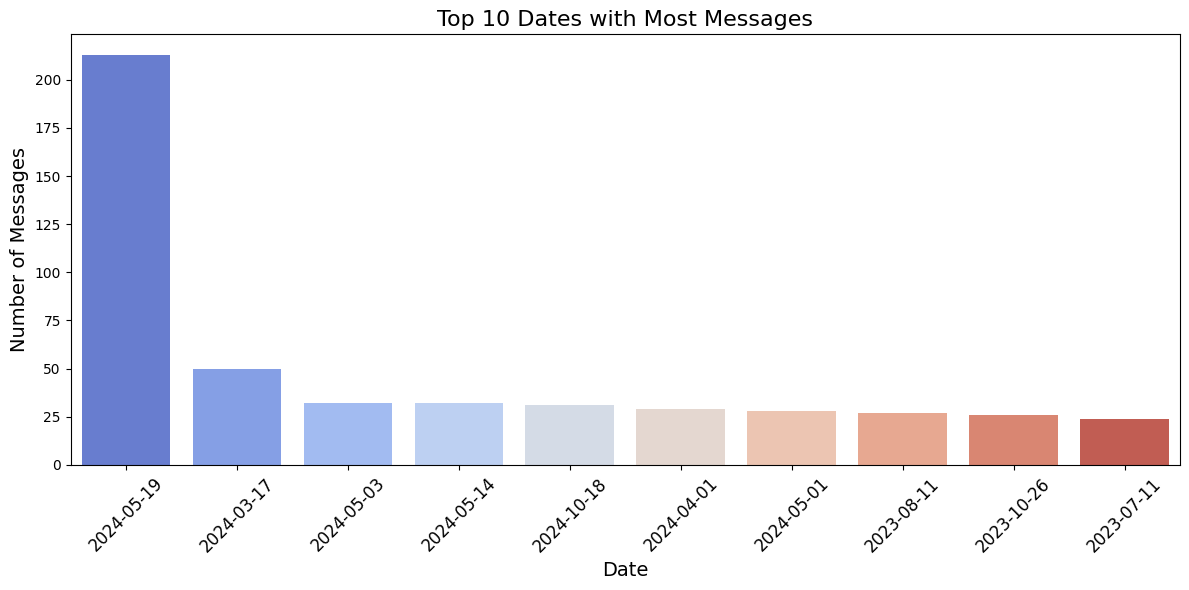

In [69]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Replace 'Date' with the actual column name

# Group by date and count the number of messages
date_message_counts = df.groupby(df['Date'].dt.date)['Message'].count().reset_index()
date_message_counts.rename(columns={'Message': 'MessageCount', 'Date': 'Date'}, inplace=True)

# Sort by MessageCount in descending order and select the top 10
top_10_dates = date_message_counts.sort_values(by='MessageCount', ascending=False).head(10)

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_dates, x='Date', y='MessageCount', palette='coolwarm')

# Customizing the plot
plt.title("Top 10 Dates with Most Messages", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Messages", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128420 (\N{BLACK HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


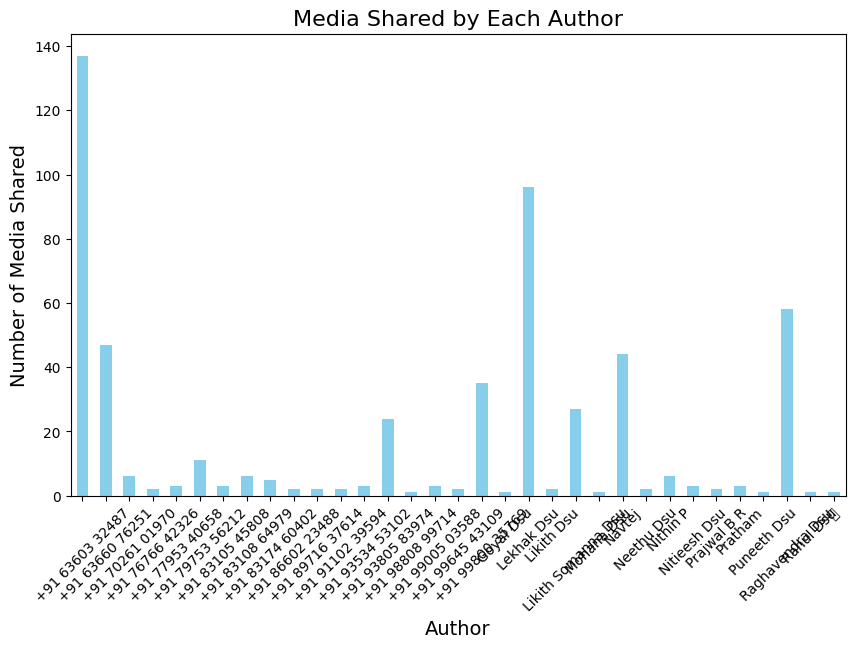

In [71]:
# Filter messages containing media
media_counts = df[df['Message'] == "<Media omitted>"].groupby('Author').size()

# Plot a bar chart
plt.figure(figsize=(10, 6))
media_counts.plot(kind='bar', color='skyblue')

plt.title("Media Shared by Each Author", fontsize=16)
plt.xlabel("Author", fontsize=14)
plt.ylabel("Number of Media Shared", fontsize=14)
plt.xticks(rotation=45)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14492\2627589323.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_media_sharers, x='Author', y='MediaCount', palette='viridis')


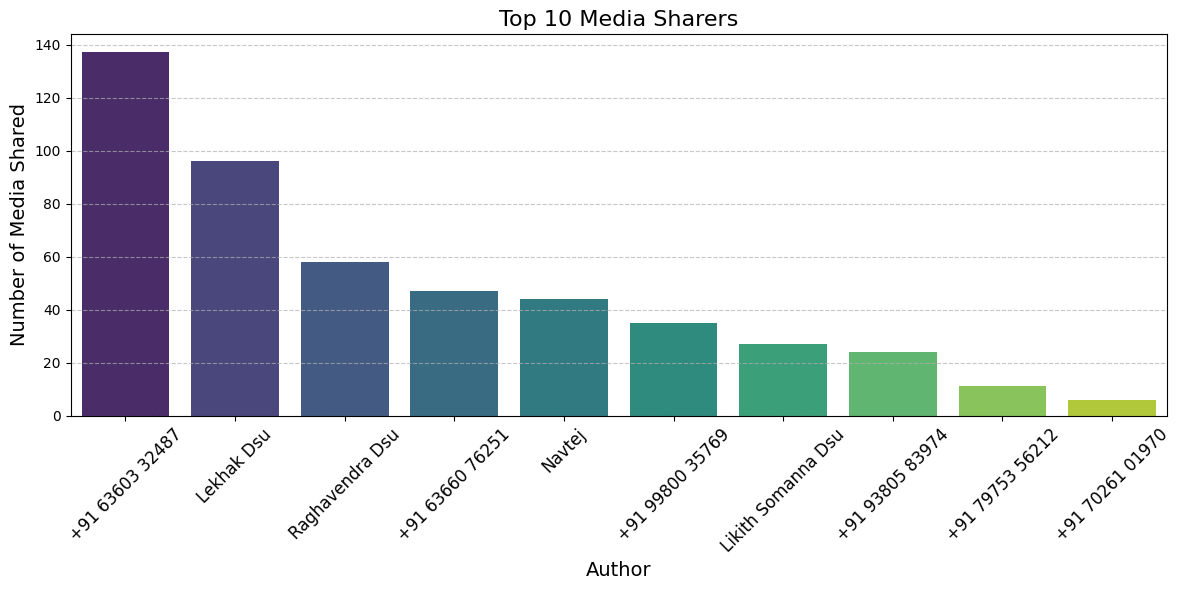

Top 10 Media Sharers:
                Author  MediaCount
0      +91 63603 32487         137
19          Lekhak Dsu          96
30     Raghavendra Dsu          58
1      +91 63660 76251          47
23              Navtej          44
17     +91 99800 35769          35
21  Likith Somanna Dsu          27
13     +91 93805 83974          24
5      +91 79753 56212          11
2      +91 70261 01970           6


In [76]:
# Filter messages that indicate media sharing
media_shared = df[df['Message'] == "<Media omitted>"]  # Adjust the string to match your dataset

# Group by author to analyze who shares the most media
media_counts = media_shared.groupby('Author').size().reset_index(name='MediaCount')

# Sort by the number of media shared and select the top 10
top_10_media_sharers = media_counts.sort_values(by='MediaCount', ascending=False).head(10)

# Plotting the top 10 media sharers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_media_sharers, x='Author', y='MediaCount', palette='viridis')

# Customize the plot
plt.title("Top 10 Media Sharers", fontsize=16)
plt.xlabel("Author", fontsize=14)
plt.ylabel("Number of Media Shared", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Display the top 10 media sharers as a DataFrame
print("Top 10 Media Sharers:")
print(top_10_media_sharers)
